In [372]:
import pandas as pd
# я не користувалась плотлібом, тому видалила його імпортування

# Dataset: Open Power System Data

In this task you'll be working with daily time series of [Open Power System Data (OPSD)](https://open-power-system-data.org/) for Germany that has been [rapidly expanding its renewable energy production in recent years](https://www.independent.co.uk/environment/renewable-energy-germany-six-months-year-solar-power-wind-farms-a8427356.html). The dataset includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

* `Date` — The date (yyyy-mm-dd format)
* `Consumption` — Electricity consumption in GWh
* `Wind` — Wind power production in GWh
* `Solar` — Solar power production in GWh
* `Wind+Solar` — Sum of wind and solar power production in GWh

# Data Loading

## Task 1. Load the data: Part I

Load the CSV file `opsd_germany_daily.csv` into pandas DataFrame:

In [373]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv")

In [374]:
opsd_daily.shape

(4383, 5)

In [375]:
print(opsd_daily.dtypes) #в пайчармі виглядає по різному, в залежності від наявності print()

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


In [376]:
opsd_daily #це я для себе

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [377]:
pd.DataFrame(opsd_daily).head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [378]:
pd.DataFrame(opsd_daily).tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [379]:
opsd_daily.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [380]:
opsd_daily['Date'].describe()

count           4383
unique          4383
top       2006-01-01
freq               1
Name: Date, dtype: object

We see that `Date` column is loaded as plain strings and some values are missing for `Wind` and `Solar` columns.

## Task 2. Load the Data: Part II

Load the file into the same variable, but now make pandas to parse the dates and set them as DataFrame index.

In [381]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv", index_col="Date", parse_dates=["Date"])
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


Drop rows that contain `NA` values.

In [382]:
opsd_daily = opsd_daily.dropna()
opsd_daily
# деяка інфо для декількох колонок не записувалась до 2012!

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-01,948.12800,227.465,6.587,234.052
2012-01-02,1269.58100,207.327,6.574,213.901
2012-01-03,1334.74500,473.468,24.679,498.147
2012-01-04,1347.13600,499.804,14.681,514.485
2012-01-05,1376.65800,523.851,5.071,528.922
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [383]:
opsd_daily.describe()

,Consumption,Wind,Solar,Wind+Solar
count,2187.000000,2187.000000,2187.000000,2187.000000
mean,1347.519037,183.431878,89.231604,272.663481
std,166.551363,153.390542,58.549772,146.319884
min,899.827000,6.511000,1.968000,21.478000
25%,1222.042000,72.367000,35.161500,172.185500
50%,1380.220000,136.842000,86.390000,240.991000
75%,1460.072500,245.027500,135.038000,338.988000
max,1682.002000,826.278000,241.580000,851.556000


## Task 3. Date Feature Extraction

Add columns with year, month, and weekday name.

In [384]:
# opsd_daily.index = pd.to_datetime(opsd_daily.index)
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Weekday"] = opsd_daily.index.day_name()
opsd_daily["Month"] = opsd_daily.index.month

/var/folders/_p/ql4p8w016wd394h202vwvm1m0000gn/T/ipykernel_7580/3526523016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opsd_daily["Year"] = opsd_daily.index.year
/var/folders/_p/ql4p8w016wd394h202vwvm1m0000gn/T/ipykernel_7580/3526523016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opsd_daily["Weekday"] = opsd_daily.index.day_name()
/var/folders/_p/ql4p8w016wd394h202vwvm1m0000gn/T/ipykernel_7580/3526523016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [385]:
opsd_daily.sample(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Month
Date,,,,,,,
2012-03-07,1455.451,157.059,75.157,232.216,2012,Wednesday,3
2014-08-05,1348.567,28.091,127.136,155.227,2014,Tuesday,8
2013-09-12,1343.379,20.095,60.910,81.005,2013,Thursday,9


# Exploring the data

## Task 4. Indexing with dates

Select the data for a single day 24 Aug, 2017.

In [386]:
# opsd_daily.loc[(opsd_daily.index == '2017-08-24')] можна і так. я не бачу великої різниці, окрім як вигляд аутпуту
opsd_daily.loc['2017-08-24']

Consumption    1381.885
Wind            188.635
Solar           146.341
Wind+Solar      334.976
Year               2017
Weekday        Thursday
Month                 8
Name: 2017-08-24 00:00:00, dtype: object

Select the data for a period of Aug, 2017.

In [407]:
opsd_daily.loc[(opsd_daily['Year'] == 2017) & (opsd_daily['Month'] == 8)]

,Consumption,Wind,Solar,Wind+Solar,Year,Weekday,Month
Date,,,,,,,
2017-08-01,1364.81900,100.080,159.889,259.969,2017,Tuesday,8
2017-08-02,1365.73500,103.491,165.591,269.082,2017,Wednesday,8
2017-08-03,1389.44500,402.361,120.167,522.528,2017,Thursday,8
2017-08-04,1349.42300,455.379,145.631,601.010,2017,Friday,8
2017-08-05,1130.13400,232.881,148.611,381.492,2017,Saturday,8
2017-08-06,1024.32400,168.420,164.458,332.878,2017,Sunday,8
2017-08-07,1302.06200,123.843,216.117,339.960,2017,Monday,8
2017-08-08,1343.89900,247.468,143.742,391.210,2017,Tuesday,8
2017-08-09,1342.43200,208.824,169.034,377.858,2017,Wednesday,8


Calculate the sum of energy consumption and the sum of wind and solar energy production for the period of Aug, 2017.

In [408]:
 # 40029.77368
cons_sum = opsd_daily[(opsd_daily['Year'] == 2017)& (opsd_daily['Month'] == 8)]['Consumption'].sum()
print("Consumption: ", cons_sum)

Consumption:  40029.77368


In [409]:
ws_sum = opsd_daily[(opsd_daily['Year'] == 2017)& (opsd_daily['Month'] == 8)]['Wind+Solar'].sum()
print("Wind+Solar: ", ws_sum)

Wind+Solar:  10102.605999999998


## Task 5. Visualizing time series data

I recommend using this parameter for your charts to make them bigger. Then whenever you call `plot` method, just pass this keyword argument: `figsize=figsize`. You can play around and find what are the best options for you.

In [391]:
figsize = (11, 5)

Create a line plot of the full time series of Germany's daily electricity consumption, using the DataFrame's `plot()` method.

<Axes: title={'center': 'Consumption for all the time'}, xlabel='Date', ylabel='Daily Totals (GWh)'>

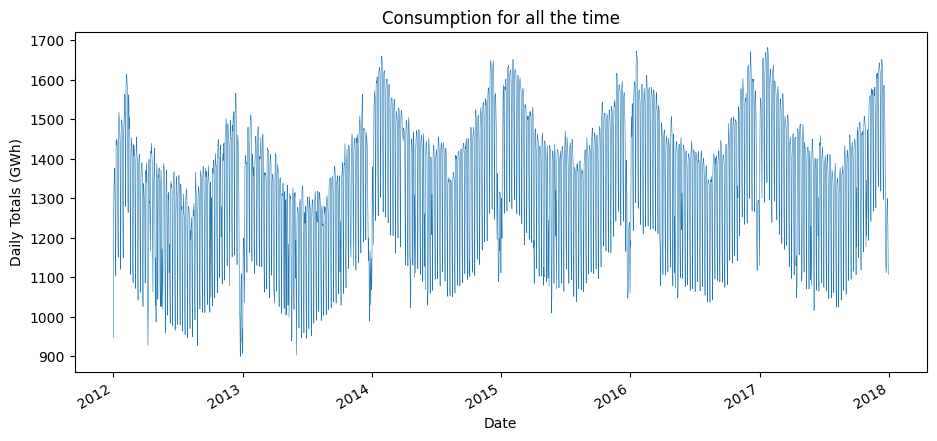

In [412]:
opsd_daily['Consumption'].plot(figsize = (11, 5), title='Consumption for all the time',ylabel='Daily Totals (GWh)', xlabel='Date', linewidth=0.4)

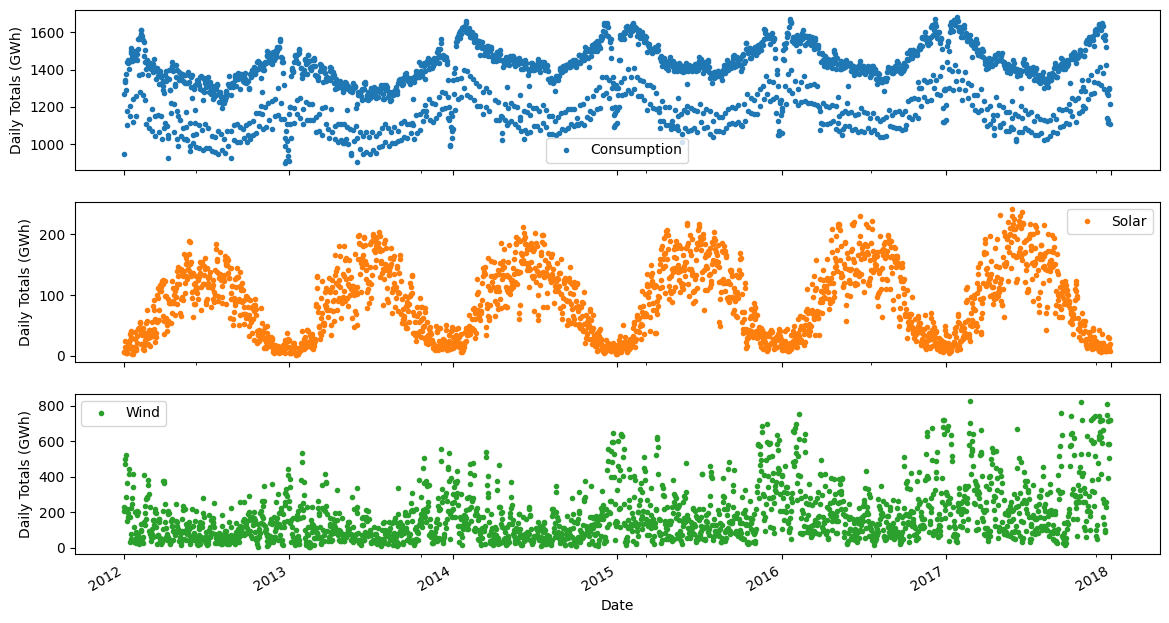

In [416]:
axes = opsd_daily[['Consumption', 'Solar', 'Wind']].plot(style='.', figsize=(14, 8), subplots=True, ylabel="Daily Totals (GWh)")
# ми в принципі можемо змінити позицію ледженду через матплотлібівський loc=значення локації на графі. за потреби це можна додати

We can see that the `plot()` method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful. However, with so many data points, the line plot is crowded and hard to read. Plot the data as dots instead and add the `Solar` and `Wind` power production values using `subplots=True`. Also, you can increase the figure size to an appropriate size.

We can already see some interesting patterns emerge:

* Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
* Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.
* Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
* Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
* There appears to be a strong increasing trend in wind power production over the years.

All three time series clearly exhibit periodicity — often referred to as **seasonality** in time series analysis—in which a pattern repeats again and again at regular time intervals. The `Consumption`, `Solar`, and `Wind` time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. However, seasonality in general does not have to correspond with the meteorological seasons. For example, retail sales data often exhibits yearly seasonality with increased sales in November and December, leading up to the holidays.

Seasonality can also occur on other time scales. The plot above suggests there may be some weekly seasonality in Germany's electricity consumption, corresponding with weekdays and weekends. Now plot the time series in a single 2017 year to investigate further.

<Axes: xlabel='Date', ylabel='Daily Totals (GWh)'>

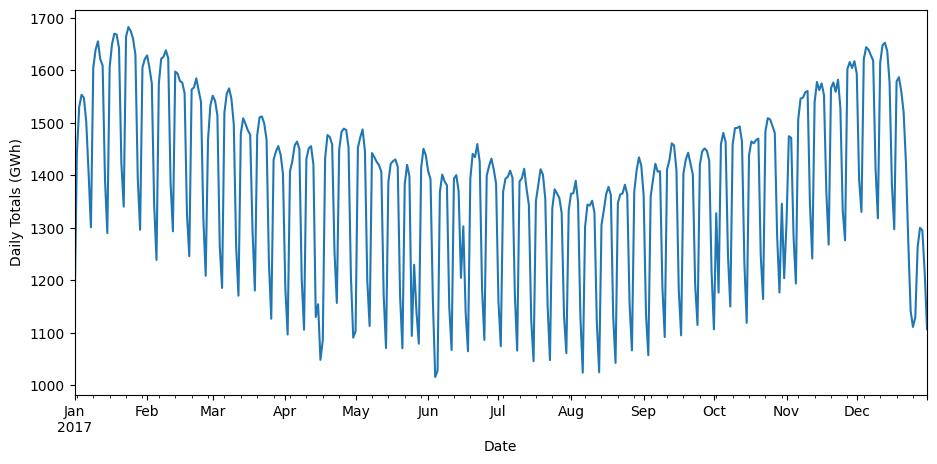

In [418]:
seasons2017 = opsd_daily[(opsd_daily.index.year == 2017)]
seasons2017['Consumption'].plot(figsize=(11, 5), xlabel='Date', ylabel='Daily Totals (GWh)')

Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

Plot the consumption only for January and February 2017.

<Axes: title={'center': 'Consumption (Jan - Feb, 2017)'}, xlabel='Date', ylabel='Daily totals (GWh)'>

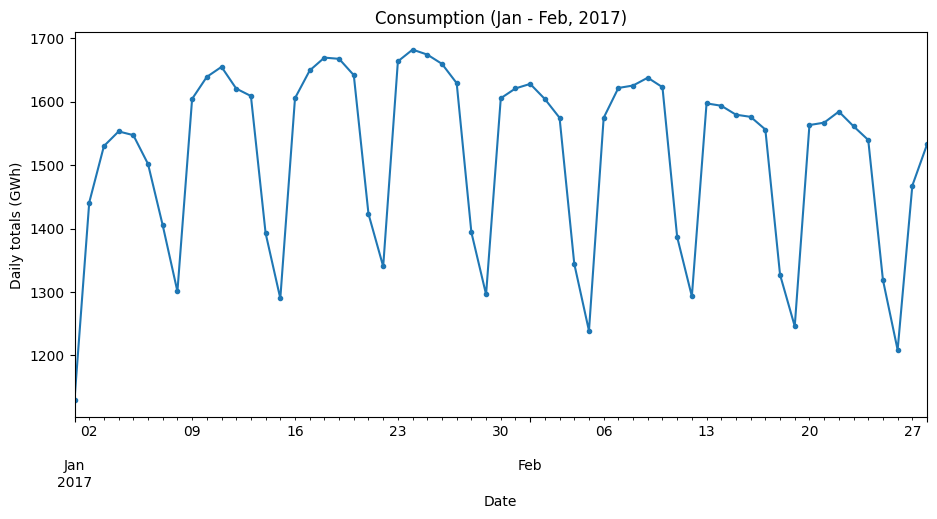

In [421]:
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2017-02-28")
opsd_daily[start_date:end_date]['Consumption'].plot(figsize=figsize, kind="line",marker="." , ylabel="Daily totals (GWh)", title= "Consumption (Jan - Feb, 2017)")

As we suspected, consumption is highest on weekdays and lowest on weekends.

## Task 6. Resampling the data to know trends

Resample the data to a weekly mean time series.

In [423]:
weekly_opsd = opsd_daily[["Consumption","Wind", "Solar"]].resample("W").mean()
weekly_opsd.head(3)

,Consumption,Wind,Solar
Date,,,
2012-01-01,948.128000,227.465000,6.587000
2012-01-08,1271.200857,368.550571,10.960000
2012-01-15,1361.100714,227.979571,19.160286


In [398]:
# тут в принципі можна будь-які ще колонки додати. це я для себе зробила
opsd_daily.resample("M")["Consumption"].mean().head(3)

Date
2012-01-31    1351.441226
2012-02-29    1426.666241
2012-03-31    1294.748258
Freq: M, Name: Consumption, dtype: float64

Plot the daily and weekly `Solar` time series together over a single six-month period to compare them.

array([<Axes: xlabel='Date'>], dtype=object)

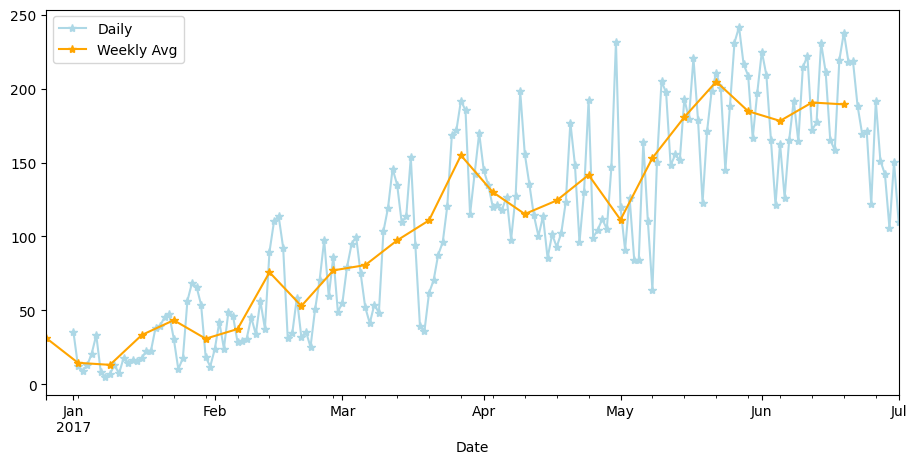

In [424]:
sixmonths_week = weekly_opsd[(weekly_opsd.index >= '2017-01-01') & (weekly_opsd.index <= '2017-07-01')]
sixmonths_daily = opsd_daily[(opsd_daily.index >= '2017-01-01') & (opsd_daily.index <= '2017-07-01')]
sixmonths_daily['Solar'].plot(style='-*' , color = "lightblue", figsize=(11, 5), subplots=True, label="Daily",legend=True)
sixmonths_week["Solar"].plot(style='-*', color="orange", figsize=(11, 5), subplots=True, label="Weekly Avg", legend=True)


We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

Now let's resample the data to monthly frequency, aggregating with sum totals instead of the mean.

In [401]:
month_sum_resampled = opsd_daily[["Consumption", "Wind", "Solar"]].resample('M').sum()
month_sum_resampled.head(3)

,Consumption,Wind,Solar
Date,,,
2012-01-31,41894.678,7040.795,537.740
2012-02-29,41373.321,4576.384,1046.718
2012-03-31,40137.196,4028.524,2346.897


Explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot (use `kind="area"` in keyword arguments to `plot` method).

<Axes: xlabel='Date', ylabel='Monthly total (GWh)'>

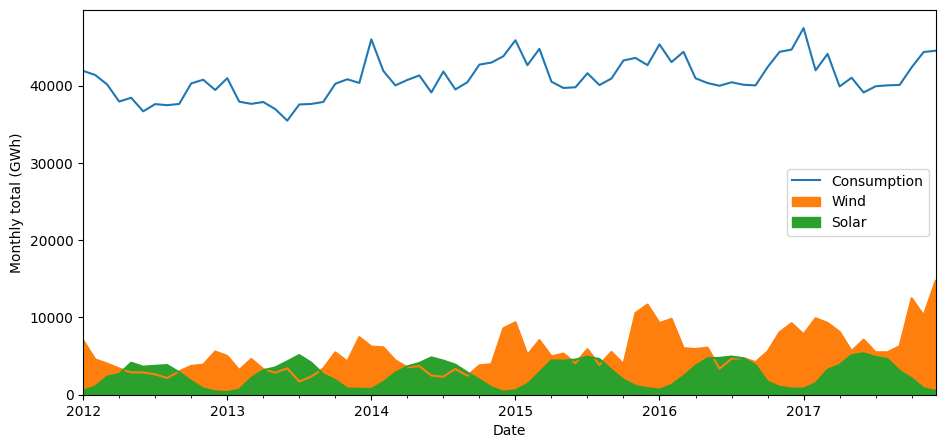

In [402]:
month_sum_resampled["Consumption"].plot(figsize=(11, 5), ylabel= "Monthly total (GWh)", xlabel="Date",  legend=True)
# щодо цього завдання я писала Вам у тімзі. не знаю, чим спричинене неправильне виведення графіку в комбінації вінд, солар
# і виведенні потрібного при вінд, вінд+солар
# month_sum_resampled["Wind+Solar"].plot(kind="area",  legend=True)
month_sum_resampled["Wind"].plot(kind="area",  legend=True)
month_sum_resampled["Solar"].plot(kind="area",  legend=True)

At this monthly time scale, we can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed.

Explore this further by resampling to annual frequency and computing the ratio of `Wind+Solar` to `Consumption` for each year.

In [403]:
box = opsd_daily[['Consumption', 'Wind+Solar',"Year"]]
box = box.resample("Y").sum()
annual_sum = box
annual_sum["Wind+Solar/Consuption"] = (annual_sum['Wind+Solar']/annual_sum['Consumption'])
annual_sum.index = box.index.year
annual_sum.head(3)

,Consumption,Wind+Solar,Year,Wind+Solar/Consuption
Date,,,,
2012,469574.754,73749.999,736392,0.157057
2013,461241.065,76697.443,730719,0.166285
2014,500280.028,83370.502,729068,0.166648


Plot the wind + solar share of annual electricity consumption as a bar chart.

<Axes: title={'center': 'Wind+Solar Share of Annual Electricity Consumption'}, xlabel='Year', ylabel='Fraction'>

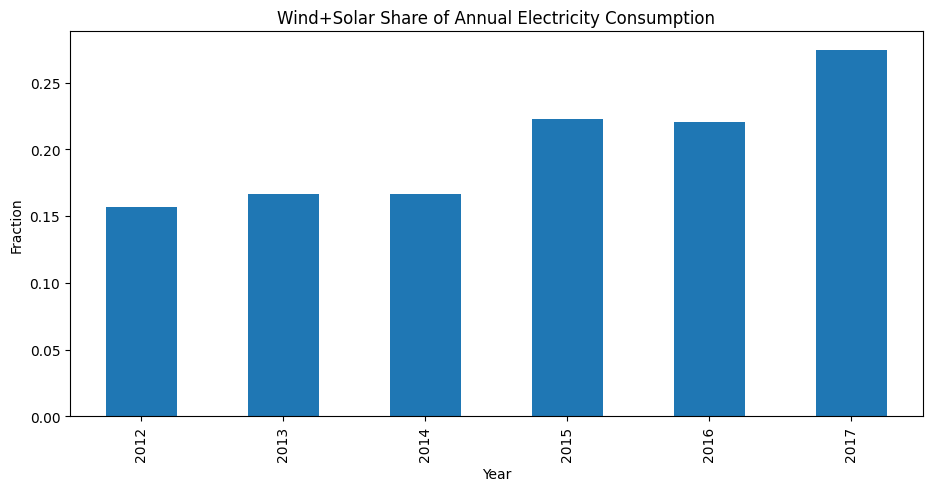

In [404]:

annual_sum["Wind+Solar/Consuption"].plot.bar(figsize=(11, 5), xlabel='Year',ylabel='Fraction', title='Wind+Solar Share of Annual Electricity Consumption')

We can see that wind + solar production as a share of annual electricity consumption has been increasing from about 15% in 2012 to about 27% in 2017.